# Analyzing the results of Graph-Sparse Logistic Regression (GSLR) CV against the the single-pathway upsampling strategy synthetic datasets

## I. Unpack results.

In [2]:
%pylab inline
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib_venn import venn3, venn3_circles, venn2
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

repo_path = '/Users/alex/Documents/gslr/'
KEGG_path = repo_path + 'experiments/KEGG/KEGG_df.filtered.with_correlates.pickle'

# list of pathway_id, losses, features
results = pickle.load(open('GSLR_results.pickle', 'rb'))

Populating the interactive namespace from numpy and matplotlib


## II. Analyze test-accuracy across folds (k = 10)

In [3]:
accuracies = pd.DataFrame({pathway_id: accuracies for pathway_id, accuracies, features in results})
accuracies

,hsa00970,hsa01521,hsa01522,hsa01523,hsa01524,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
0,0.60,0.50,0.70,0.45,0.50,0.70,0.60,0.85,0.60,0.65,...,1.00,0.90,1.00,0.80,0.85,0.90,0.85,0.90,1.00,0.95
1,0.55,0.55,0.40,0.40,0.45,0.60,0.85,0.70,0.90,0.65,...,1.00,0.90,1.00,0.85,0.70,0.85,1.00,0.90,0.95,1.00
2,0.65,0.50,0.40,0.50,0.50,0.65,0.65,0.85,0.70,0.80,...,1.00,1.00,1.00,0.90,0.70,0.95,0.90,0.90,1.00,1.00
3,0.70,0.50,0.45,0.40,0.70,0.60,0.55,0.90,0.70,0.80,...,0.90,0.85,1.00,0.80,0.70,0.90,0.85,0.85,1.00,1.00
4,0.75,0.60,0.50,0.55,0.70,0.75,0.80,0.70,0.70,0.75,...,1.00,0.95,0.95,0.90,0.80,0.85,0.95,0.90,0.95,0.95
5,0.75,0.65,0.45,0.60,0.45,0.50,0.65,0.90,0.80,0.85,...,1.00,1.00,1.00,0.95,0.65,0.95,0.75,0.70,1.00,0.95
6,0.55,0.60,0.60,0.40,0.45,0.75,0.95,0.85,0.65,0.55,...,0.95,1.00,0.95,0.85,0.75,0.85,0.90,0.95,0.95,0.90
7,0.75,0.45,0.40,0.60,0.45,0.60,0.50,0.85,0.80,0.80,...,1.00,1.00,1.00,0.65,0.70,0.95,0.75,0.80,0.90,0.95
8,0.55,0.55,0.60,0.50,0.40,0.60,0.35,0.90,0.70,0.55,...,1.00,1.00,1.00,0.95,0.90,0.80,0.90,0.90,1.00,0.95
9,0.40,0.50,0.45,0.50,0.20,0.75,0.60,0.75,0.60,0.50,...,1.00,0.90,0.95,0.80,0.70,0.85,0.80,1.00,0.95,0.95


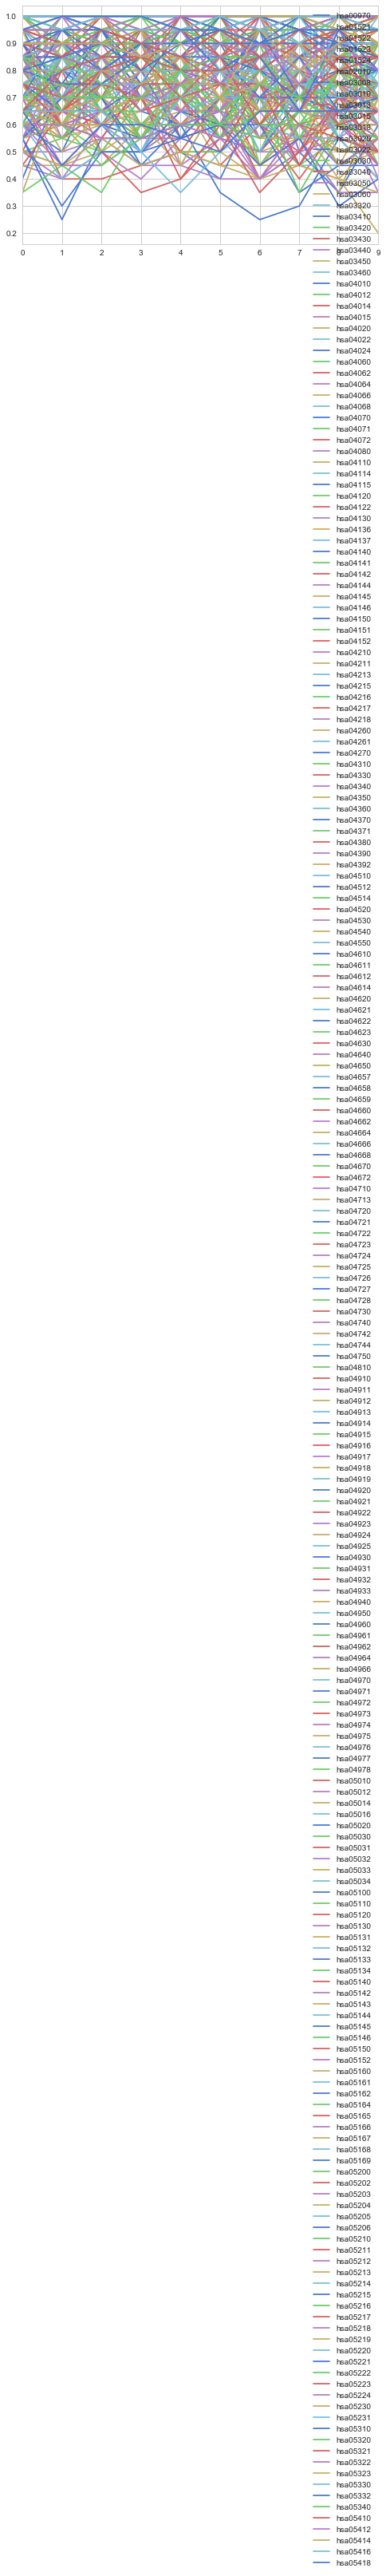

In [4]:
accuracies.plot()

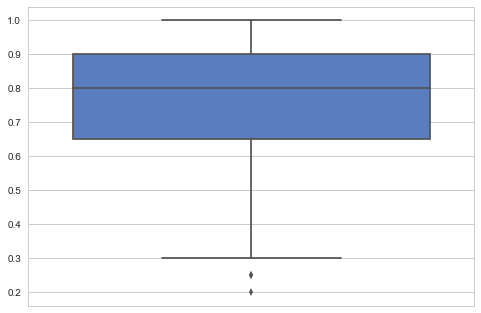

In [5]:
sns.boxplot(y=pd.melt(accuracies)['value'].tolist())

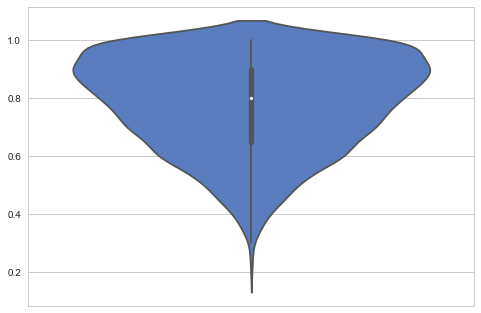

In [6]:
sns.violinplot(y=pd.melt(accuracies)['value'].tolist())

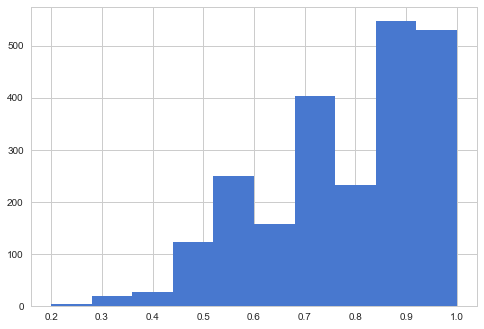

In [7]:
pd.melt(accuracies)['value'].hist()

## III. Analyze pathway recovery

In [8]:
pathways_df = pd.read_pickle(KEGG_path)

pathways = {pathway_id: pathways_df.loc[pd.IndexSlice[:, :, [pathway_id]],['genes', 'correlates']].values[0][0] for pathway_id in pathways_df.index.get_level_values(2)}

features = {pathway_id: features for pathway_id, accuracies, features in results}

set(pathways.keys()) == set(features.keys())

True

In [9]:
features = {key: (set(pathways[key]), set(features[key])) for key in (set(pathways.keys()) & set(features.keys()))}

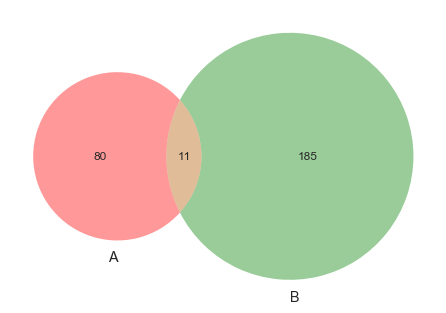

In [10]:
pair = list(features.items())[0][1]
venn2([pair[0], pair[1]])

In [11]:
def recall(truth, pred):    
    return len(truth & pred) / float(len(truth))
    
def precision(truth, pred):
    return len(truth & pred) / float(len(pred))

In [12]:
summary = {pathway: (recall(truth, pred), precision(truth, pred)) for pathway, (truth, pred) in features.items()  if len(truth) > 0}
summary = pd.DataFrame(summary, index=['recall', 'precision'])
summary

,hsa00970,hsa02010,hsa03008,hsa03010,hsa03013,hsa03015,hsa03018,hsa03020,hsa03022,hsa03030,...,hsa05322,hsa05323,hsa05330,hsa05332,hsa05340,hsa05410,hsa05412,hsa05414,hsa05416,hsa05418
recall,0.151515,0.136364,0.099010,0.117647,0.157895,0.142857,0.141026,0.290323,0.222222,0.388889,...,0.240602,0.233333,0.394737,0.365854,0.243243,0.289157,0.277778,0.233333,0.389831,0.309353
precision,0.059172,0.033520,0.052632,0.107143,0.167702,0.071429,0.070064,0.049180,0.056497,0.088608,...,0.347826,0.156716,0.115385,0.108696,0.048649,0.198347,0.125786,0.153285,0.190083,0.409524


In [13]:
summary.mean(axis=1)

recall       0.222816
precision    0.151516
dtype: float64

In [14]:
summary.std(axis=1)

recall       0.088865
precision    0.107376
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111b0bb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111be35c0>]], dtype=object)

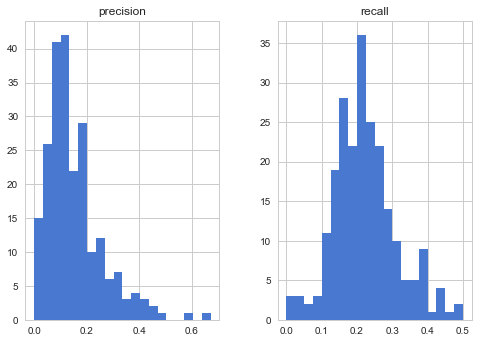

In [15]:
summary.transpose().hist(bins=20)